In [181]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math

In [182]:
images = pd.read_csv('https://raw.githubusercontent.com/anurag-25/Machine-Learning/main/handwritten_image_data/training_images.txt', sep='\t', header = None)
labels = pd.read_csv('https://raw.githubusercontent.com/anurag-25/Machine-Learning/main/handwritten_image_data/training_labels.txt', sep='\t', header = None)

In [183]:
images = images.values
labels = labels.values

In [184]:
x = images
y = labels

[0][4][4][7][7][9][3][9][6][4]

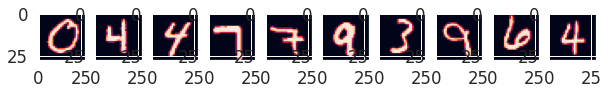

In [185]:
fig, arr = plt.subplots (1,10, figsize = (10,1))
for i in range(10):
    image = images[i]
    arr[i].imshow(image.reshape((28,28), order = 'F')) 
for i in range (10):
    print (labels[i], end = '')

## Dataset Splitting into Training and Testing set

In [186]:
def train_test_split(dataset, ratio=0.8):
    size_of_dataset = len(dataset)
    train_size = int (size_of_dataset * ratio)
    train_set = dataset [:train_size, :]
    test_set = dataset [train_size:, :]
    return train_set, test_set

In [187]:
def train_test_split_vector (dataset, ratio=0.8):
    size_of_dataset = len(dataset)
    train_size = int (size_of_dataset * ratio)
    train_set = dataset [:train_size]
    test_set = dataset [train_size:]
    return train_set, test_set

In [188]:
X = np.c_ [np.ones(len(x)), x]
X_train, X_test = train_test_split(X, ratio = 0.3)
y_train, y_test = train_test_split_vector (y, ratio = 0.3)
print (X_train.shape, X_test.shape)
print (y_train.shape, y_test.shape)

(1500, 785) (3500, 785)
(1500, 1) (3500, 1)


In [189]:
def hypothesis (X, w):
    z = np.dot (X, w)
    return 1/(1+np.exp(-z))

def Ein (X, y, w):
    h_x = hypothesis (X, w)
    log_error = -np.sum(y*np.log(h_x) + (1-y)*np.log(1-h_x))
    return log_error/ len(X)

In [190]:
def gradientDescent (X, y, w, alpha = 0.1, iter = 1000):

    errors = []
    i=0
    while i < iter:
        currentError = Ein (X, y, w)
        h_x = hypothesis (X, w)
        gradient = np.dot (X.T, (h_x - y)) / (len(X))
        
        if i>0 and currentError > errors[i-1]:
            alpha = alpha/2
            errors.pop()
            w = w - alpha*gradient
            i = i - 1
            continue

        errors.append (currentError)
        w = w - alpha*gradient

        if errors[i-1]-errors[i] < 1e-6 and errors[i-1]-errors[i] > 0 and i > 0:
            print ("Converged at k = ", i)
            break
        
        i = i + 1
    return w, errors

In [191]:
def fit (X, y, alpha = 0.1, iter = 1000):
    numFeatures = X.shape[1]
    print ("Num of fetures = ", numFeatures) 
    w = []
    totalErrors = []
    yValues = np.unique (y)
    for i in yValues:
        print ("Learning y = ", i)

        current_y = np.where (y==i, 1, 0)
        current_y = current_y.reshape (current_y.shape[0])

        current_w = np.zeros (numFeatures)
        current_w, errors = gradientDescent (X, current_y, current_w, alpha, iter)  
        w.append (current_w)
        totalErrors.append (errors)
    totalErrors = np.array (totalErrors)
    w = np.array (w)

    return w, totalErrors 

## Optimal weight parameters of all the 10 classes

In [192]:
wLearned, errorLearner = fit (X_train, y_train, iter = 1000)
q=pd.DataFrame(wLearned)
q

Num of fetures =  785
Learning y =  0
Learning y =  1
Learning y =  2
Learning y =  3
Learning y =  4
Learning y =  5
Learning y =  6
Learning y =  7
Learning y =  8
Learning y =  9


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,-0.702946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004013,...,-0.000327,-0.000555,-0.000174,-0.006241,-0.007387,-0.001627,-0.000052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.001118,-0.000339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000005,-0.000009,-0.000009,-0.000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.085069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000224,...,-0.002258,-0.016334,-0.003468,-0.001736,-0.001772,-0.000081,-0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000081,-0.000024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000004,-0.000007,-0.000007,-0.000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.657679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.001065,...,0.003774,0.046078,0.013147,0.045990,0.040178,0.007224,0.000223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000041,-0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000016,-0.000029,-0.000029,-0.000011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.598716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000825,...,-0.002890,-0.003865,-0.001707,-0.011016,-0.013839,-0.005773,-0.000186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000060,-0.000018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000004,-0.000008,-0.000008,-0.000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.522925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.001123,...,0.025857,0.024587,0.008184,-0.001831,-0.001386,-0.000095,-0.000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000297,-0.000090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000679,0.001245,0.001245,0.000453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.254651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.002616,...,-0.001425,-0.002618,-0.000763,-0.004641,-0.005125,-0.000587,-0.000019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003591,0.001088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000030,-0.000056,-0.000056,-0.000020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.607369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000272,...,-0.019863,-0.030081,-0.006676,-0.028266,-0.030687,-0.000140,-0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000073,-0.000022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000178,-0.000326,-0.000326,-0.000118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-0.387716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005059,...,-0.000704,-0.001872,-0.001618,-0.012837,-0.009124,-0.001727,-0.000055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.001670,-0.000506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000017,-0.000030,-0.000030,-0.000011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-1.748897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.001170,...,-0.005688,-0.010602,-0.003626,-0.008067,-0.006736,-0.000621,-0.000018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000746,-0.000226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000137,-0.000251,-0.000251,-0.000091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

## Output And Accuracy

In [193]:
def predict (X, wLearnt):
    # X_predicted = [max((Logreg._sigmoid_function(i.dot(theta)), c) for theta, c in Logreg.theta)[1] for i in X ]
    # for x in X:
    predictions = []
    for w in wLearnt:
        predictions.append (hypothesis(X,w))
    predictions = np.array(predictions)
    predicted_y = np.argmax (predictions, axis =0)
    return predicted_y

In [194]:
def accuracy (y_pred,y_train_test):
    sum = 0
    for i in range (len(y_pred)):
        if y_pred[i] == y_train_test[i]:
            sum += 1
    return sum*100/len(y_pred)

In [195]:
y_pred_train= predict (X_train, wLearned)
y_pred_train.shape

(1500,)

In [196]:
accuracy(y_pred_train,y_train)

92.0

In [197]:
y_pred_test = predict (X_test, wLearned)

In [198]:
accuracy (y_pred_test,y_test)

88.8

In [199]:
for i in range (20):
    print ("Predicted y = ", y_pred_test[i], "Actual y = ", y_test[i])

Predicted y =  0 Actual y =  [0]
Predicted y =  6 Actual y =  [6]
Predicted y =  9 Actual y =  [9]
Predicted y =  7 Actual y =  [2]
Predicted y =  8 Actual y =  [8]
Predicted y =  0 Actual y =  [0]
Predicted y =  9 Actual y =  [9]
Predicted y =  7 Actual y =  [7]
Predicted y =  4 Actual y =  [4]
Predicted y =  9 Actual y =  [9]
Predicted y =  9 Actual y =  [9]
Predicted y =  1 Actual y =  [1]
Predicted y =  6 Actual y =  [6]
Predicted y =  1 Actual y =  [1]
Predicted y =  2 Actual y =  [2]
Predicted y =  0 Actual y =  [0]
Predicted y =  3 Actual y =  [3]
Predicted y =  7 Actual y =  [7]
Predicted y =  2 Actual y =  [2]
Predicted y =  9 Actual y =  [9]


In [200]:
def confusionMatrix (yPredicted, yActual):
    N = len (np.unique (yActual) )
    matrix = np.zeros ((N, N), dtype = int)
    for i in range (len(yActual)):
        if (yPredicted [i] == yActual [i]):
            index = int (yPredicted [i])
            matrix [index][index] += 1
        else:
            row = int (yActual [i])
            col = int (yPredicted [i])
            matrix [row][col] += 1
    return matrix

In [201]:
matrix = confusionMatrix (y_pred_test, y_test)

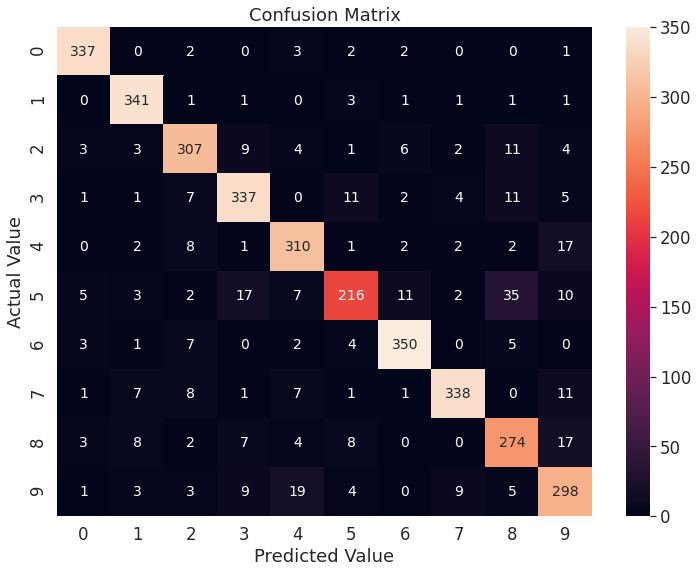

In [202]:
import seaborn as sn
plt.figure(figsize=(12,9))
axis = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cfMat = pd.DataFrame(matrix, axis, axis)
sn.set(font_scale=1.5)
ax = sn.heatmap(cfMat, fmt = 'g', annot=True, annot_kws={"size": 14})
ax.set (title = "Confusion Matrix", xlabel = "Predicted Value", ylabel = "Actual Value")
plt.show()

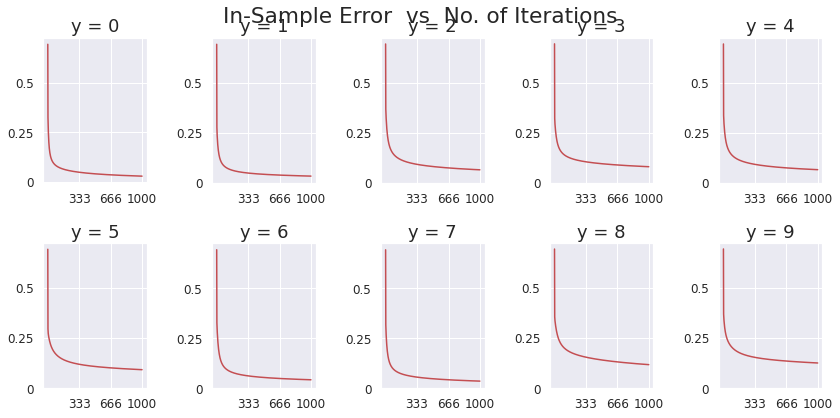

In [203]:
rows = 2
cols = 5
fig, axes = plt.subplots (rows, cols, figsize = (12, 6))
count = 0
for i in range (rows):
    for j in range (cols):
        error = errorLearner [count]
        x = np.arange (len (error))
        axes[i][j].plot (x, error, 'r')
        axes[i][j].set_title ("y = " + str (count))
        N = len(error)
        axes[i][j].set_xticks([N/3, 2*N/3, N]) 
        axes[i][j].set_xticklabels([N//3, 2*N//3, N], fontsize=12)

        axes[i][j].set_yticks([0, 0.25, 0.5]) 
        axes[i][j].set_yticklabels([0, 0.25, 0.5], fontsize=12)
        count += 1
fig.suptitle ("In-Sample Error  vs  No. of Iterations")
fig.tight_layout (h_pad=1)

## Regularisation Start 

In [204]:
def Ein_reg (X, y, w,lembda=7.1):
    h_x = hypothesis (X, w)
    w_modif=np.delete(w,0,0)
    log_error = -np.sum(y*np.log(h_x) + (1-y)*np.log(1-h_x))+ lembda*np.matmul(w_modif.T,w_modif)
    return log_error/ len(X)

In [205]:
def gradientDescent_reg (X, y, w, alpha = 0.1,lembda=7.1, iter = 1000):

    errors = []
    i=0
    #w_new=w
    #w_new[0]=0
    while i < iter:
        currentError = Ein_reg(X, y, w,lembda)
        h_x = hypothesis (X, w)
        w_new=w
        w_new[0]=0
        gradient = np.dot (X.T, (h_x - y)) / (len(X))+((2*lembda)/len(x))*w_new
        
        if i>0 and currentError > errors[i-1]:
            alpha = alpha/2
            errors.pop()
            w = w - alpha*gradient
            i = i - 1
            continue

        errors.append (currentError)
        w = w - alpha*gradient

        if errors[i-1]-errors[i] < 1e-10 and errors[i-1]-errors[i] > 0 and i > 0:
            print ("Converged at k = ", i)
            break
        
        i = i + 1
    return w, errors

In [206]:
def fit_reg(X, y, alpha = 0.1,lembda=7.1, iter = 1000):
    numFeatures = X.shape[1]
    print ("Num of fetures = ", numFeatures) 
    w = []
    totalErrors = []
    yValues = np.unique (y)
    for i in yValues:
        print ("Learning y = ", i)
 
        current_y = np.where (y==i, 1, 0)
        current_y = current_y.reshape (current_y.shape[0])

        current_w = np.zeros (numFeatures)
        current_w, errors = gradientDescent_reg(X, current_y, current_w, alpha,lembda, iter)  
        w.append (current_w)
        totalErrors.append (errors)
    totalErrors = np.array (totalErrors)
    w = np.array (w)

    return w, totalErrors 

## Optimal weight parameters of all the 10 classes after Regularisation

In [207]:
wLearned_reg, errorLearner_reg = fit_reg(X_train, y_train,0.1,60,1000)
x=pd.DataFrame(wLearned_reg)
x

Num of fetures =  785
Learning y =  0
Converged at k =  884
Learning y =  1
Converged at k =  867
Learning y =  2
Converged at k =  933
Learning y =  3
Converged at k =  925
Learning y =  4
Converged at k =  921
Learning y =  5
Converged at k =  954
Learning y =  6
Converged at k =  887
Learning y =  7
Converged at k =  889
Learning y =  8
Converged at k =  960
Learning y =  9
Converged at k =  935


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,-0.002345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000747,...,-0.000137,-0.000233,-0.000071,-0.000772,-0.000929,-0.000271,-8.696202e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000138,-0.000042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000002,-0.000004,-0.000004,-0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.000528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000117,...,-0.000568,-0.001840,-0.000442,-0.000699,-0.000727,-0.000031,-6.408880e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000040,-0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000002,-0.000003,-0.000003,-0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.002312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000294,...,0.001156,0.004887,0.001398,0.005944,0.006459,0.001420,4.255432e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000017,-0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000005,-0.000010,-0.000010,-0.000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.002088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000327,...,-0.000421,-0.000595,-0.000195,-0.001084,-0.001353,-0.000531,-1.707362e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000026,-0.000008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000002,-0.000003,-0.000003,-0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.001640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000469,...,0.003539,0.003141,0.001051,-0.000547,-0.000426,-0.000039,-1.138356e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000079,-0.000024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000093,0.000171,0.000171,0.000062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.001519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000537,...,-0.000351,-0.000632,-0.000188,-0.000686,-0.000752,-0.000146,-4.564688e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000473,0.000143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000007,-0.000013,-0.000013,-0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.001990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000122,...,-0.001824,-0.003017,-0.000747,-0.002414,-0.002590,-0.000048,-9.740182e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000035,-0.000011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000022,-0.000040,-0.000040,-0.000014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-0.001541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001468,...,-0.000282,-0.000632,-0.000252,-0.001021,-0.000862,-0.000337,-1.067157e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000184,-0.000056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000007,-0.000013,-0.000013,-0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-0.003689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000351,...,-0.000695,-0.001308,-0.000419,-0.000973,-0.000948,-0.000157,-4.674107e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000123,-0.000037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000014,-0.000026,-0.000026,-0.00001

## Output And Accuracy After Regularisation

In [208]:
def predict_reg(X, wLearnt):
    # X_predicted = [max((Logreg._sigmoid_function(i.dot(theta)), c) for theta, c in Logreg.theta)[1] for i in X ]
    # for x in X:
    predictions = []
    for w in wLearnt:
        predictions.append (hypothesis(X,w))
    predictions = np.array(predictions)
    predicted_y = np.argmax (predictions, axis =0)
    return predicted_y

In [209]:
def accuracy_reg(y_pred,y_train_test):
    sum = 0
    for i in range (len(y_pred)):
        if y_pred[i] == y_train_test[i]:
            sum += 1
    return sum*100/len(y_pred)

In [210]:
y_pred_train_reg = predict_reg(X_train, wLearned_reg)

In [211]:
accuracy_reg(y_pred_train_reg,y_train)

85.13333333333334

In [212]:
y_pred_test_reg = predict_reg(X_test, wLearned_reg)

In [213]:
accuracy_reg(y_pred_test_reg,y_test)

84.85714285714286